# Antibody Response Simulation (Young Vs Elderly)  
This Notebook Simulates Antibody Level Changes After Vaccination For Two Groups (Young And Elderly),  
Each With 10 Participants.
Data Is Generated Using Mathematical Models Of Immune Response,  
Including Both Growth And Decay Phases, Plus Random Noise To Simulate Measurement Variability.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time points (0 to 60 days after vaccination)
days = np.arange(0, 16)

In [6]:
def simulate_group(days, peak, decay_rate, noise_std, participants):
    """
    Simulate antibody levels for a group of participants.

    Parameters:
        days (array): Time points in days.
        peak (float): Maximum antibody level.
        decay_rate (float): Rate of decline after peak.
        noise_std (float): Standard deviation of noise (measurement error).
        participants (int): Number of individuals in the group.

    Returns:
        np.ndarray: Array of shape (participants, len(days)).
    """
    group_data = []
    for i in range(participants):
        growth = 1 / (1 + np.exp(-0.3 * (days - 10)))  # logistic growth phase
        decay = np.exp(-decay_rate * (days - 20))      # exponential decay phase
        decay[days < 20] = 1                           # decay starts after day 20
        levels = growth * decay * peak

        np.random.seed(42 + i + int(peak))             # reproducibility
        levels += np.random.normal(0, noise_std, size=levels.shape)

        group_data.append(levels)

    return np.array(group_data)


In [7]:
# Generate antibody levels for both groups
young_group = simulate_group(days, peak=100, decay_rate=0.05, noise_std=3, participants=10)
elderly_group = simulate_group(days, peak=80, decay_rate=0.08, noise_std=3, participants=10)

# Calculate mean response for each group
young_mean = young_group.mean(axis=0)
elderly_mean = elderly_group.mean(axis=0)


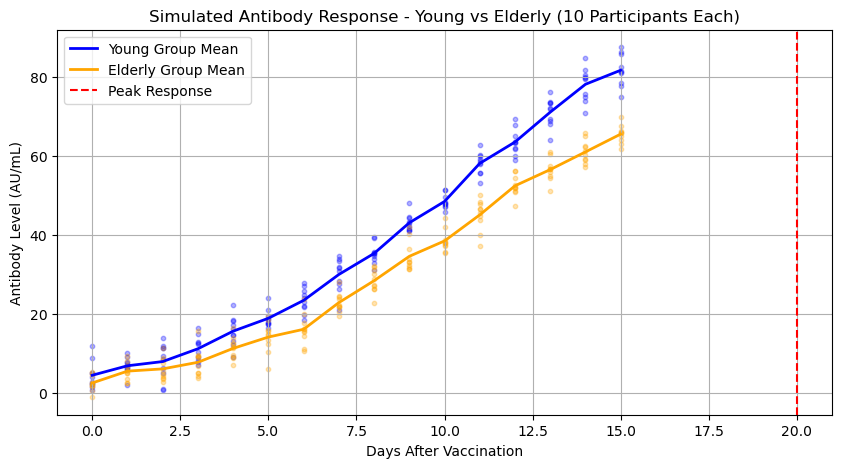

In [8]:
plt.figure(figsize=(10, 5))

# Scatter plot for individual participants
for participant in young_group:
    plt.scatter(days, participant, color='blue', alpha=0.3, s=10)
for participant in elderly_group:
    plt.scatter(days, participant, color='orange', alpha=0.3, s=10)

# Plot mean lines
plt.plot(days, young_mean, color='blue', label='Young Group Mean', linewidth=2)
plt.plot(days, elderly_mean, color='orange', label='Elderly Group Mean', linewidth=2)

# Mark peak response
plt.axvline(x=20, color='r', linestyle='--', label='Peak Response')

# Labels and title
plt.xlabel("Days After Vaccination")
plt.ylabel("Antibody Level (AU/mL)")
plt.title("Simulated Antibody Response - Young vs Elderly (10 Participants Each)")
plt.legend()
plt.grid(True)
plt.show()
